In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv("/content/member_income.csv")

In [262]:
df.head()

,HH_ID,MEM_ID,STATE,HR,REGION_TYPE,MONTH_SLOT,MONTH,REASON_FOR_NON_RESPONSE,DISTRICT,RESPONSE_STATUS,FAMILY_SHIFTED,STRATUM,PSU_ID,MEM_WEIGHT_MS,MEM_WEIGHT_FOR_COUNTRY_MS,MEM_WEIGHT_FOR_STATE_MS,MEM_NON_RESPONSE_MS,MEM_NON_RESPONSE_FOR_COUNTRY_MS,MEM_NON_RESPONSE_FOR_STATE_MS,MEMBER_STATUS,GENDER,AGE_YRS,AGE_MTHS,STATE_OF_ORIGIN,RELIGION,CASTE,RELATION_WITH_HOH,LITERACY,EDUCATION,DISCIPLINE,NATURE_OF_OCCUPATION,INDUSTRY_OF_OCCUPATION,OCCUPATION,CASTE_CATEGORY,MARITAL_STATUS,REASON_FOR_EMIGRATION,INCOME_OF_MEMBER_FROM_ALL_SOURCES,INCOME_OF_MEMBER_FROM_WAGES,INCOME_OF_MEMBER_FROM_PENSION,INCOME_OF_MEMBER_FROM_DIVIDEND,INCOME_OF_MEMBER_FROM_INTEREST,INCOME_OF_MEMBER_FROM_FD_PF_INSURANCE
0,38104269,1,Uttar Pradesh,HR 25,RURAL,Mar-20,Dec-19,No Failure,Muzaffarnagar,Accepted,N,HR 25_RURAL_R,PSU_ID_8732,4961.27,4961.27,4961.27,1.57,1.57,1.57,Member of the household,M,53,0,Uttar Pradesh,Hindu,Jat,HOH,Y,10th Std. Pass,Not Applicable,Organised Farmer,Crop Cultivation,"(Organised crop farmers) Crop cultivators, veg...",Intermediate Caste,Married,Not Applicable,52000,52000,0,0,0,0
1,48576383,11,Odisha,HR 98,URBAN,Feb-20,Dec-19,No Failure,Puri,Accepted,N,HR 98_URBAN_M,PSU_ID_7385,504.47,504.47,504.47,1.50,1.50,1.50,Member of the household,M,58,0,Odisha,Hindu,Brahmin,HOH,Y,Post Graduate,Education,White-Collar Professional Employees and Other ...,Education,University or college teachers,Upper Caste,Married,Not Applicable,50000,50000,0,0,0,0
2,37143652,1,Maharashtra,HR 45,RURAL,Feb-20,Dec-19,No Failure,Gondiya,Accepted,N,HR 45_RURAL_R,PSU_ID_11528,3186.86,3186.86,3186.86,1.51,1.51,1.51,Member of the household,M,68,0,Maharashtra,Hindu,Other OBC,HOH,Y,4th Std. Pass,Not Applicable,Small Farmer,Crop Cultivation,Subsistence crop farmers (Small crop farmers),OBC,Married,Not Applicable,48000,48000,0,0,0,0
3,85116450,1,Uttar Pradesh,HR 32,URBAN,Jan-20,Dec-19,No Failure,Faizabad,Accepted,N,HR 32_URBAN_M,PSU_ID_1847,131.06,131.06,131.06,1.26,1.26,1.26,Member of the household,M,48,0,Uttar Pradesh,Hindu,Yadav,HOH,Y,Graduate,Arts,White-Collar Professional Employees and Other ...,Utilities,Engineers,OBC,Married,Not Applicable,45000,45000,0,0,0,0
4,10467319,1,Uttarakhand,HR 33,RURAL,Feb-20,Dec-19,No Failure,Chamoli,Accepted,N,HR 33_RURAL_R,PSU_ID_12111,2996.66,2996.66,2996.66,2.26,2.26,2.26,Member of the household,M,35,0,Uttarakhand,Hindu,Brahmin,HOH,Y,Post Graduate,Arts,White Collar Clerical Employees,Education,School teachers,Upper Caste,Married,Not Applicable,38000,38000,0,0,0,0


In [263]:
df1 = df[["STATE", "REGION_TYPE","GENDER","AGE_YRS","EDUCATION","OCCUPATION","MARITAL_STATUS","INCOME_OF_MEMBER_FROM_ALL_SOURCES"]]

In [264]:
df1.isna().sum()

STATE                                0
REGION_TYPE                          0
GENDER                               0
AGE_YRS                              0
EDUCATION                            0
OCCUPATION                           0
MARITAL_STATUS                       0
INCOME_OF_MEMBER_FROM_ALL_SOURCES    0
dtype: int64

Exploratory Data Analysis

In [265]:
df1

,STATE,REGION_TYPE,GENDER,AGE_YRS,EDUCATION,OCCUPATION,MARITAL_STATUS,INCOME_OF_MEMBER_FROM_ALL_SOURCES
0,Uttar Pradesh,RURAL,M,53,10th Std. Pass,"(Organised crop farmers) Crop cultivators, veg...",Married,52000
1,Odisha,URBAN,M,58,Post Graduate,University or college teachers,Married,50000
2,Maharashtra,RURAL,M,68,4th Std. Pass,Subsistence crop farmers (Small crop farmers),Married,48000
3,Uttar Pradesh,URBAN,M,48,Graduate,Engineers,Married,45000
4,Uttarakhand,RURAL,M,35,Post Graduate,School teachers,Married,38000
...,...,...,...,...,...,...,...,...
307,Uttar Pradesh,URBAN,M,49,5th Std. Pass,Mazdoor/Helpers,Widowed,6000
308,Maharashtra,RURAL,F,38,5th Std. Pass,Agricultural labourers/Plantation workers,Married,6000
309,Uttar Pradesh,RURAL,F,42,8th Std. Pass,Other health related workers (anganwadi worker...,Married,4400
310,Bihar,RURAL,M,20,5th Std. Pass,Mazdoor/Helpers,Unmarried,3500


In [266]:
df1.describe()

,AGE_YRS,INCOME_OF_MEMBER_FROM_ALL_SOURCES
count,312.00,312.00
mean,42.73,19459.35
std,13.60,15228.96
min,20.00,3000.00
25%,28.00,7000.00
50%,45.00,14500.00
75%,52.00,30000.00
max,68.00,52000.00


In [267]:
df1.replace(['5th Std. Pass', '10th Std. Pass', 
              'Post Graduate', 'Graduate', 
              '12th Std. Pass','9th Std. Pass','4th Std. Pass','8th Std. Pass','7th Std. Pass'],
             ['10th Std and below','10th Std and below','Post Graduate','Graduate',
              '12th Std. Pass','10th Std and below','10th Std and below','10th Std and below','10th Std and below'], inplace = True)

In [268]:
category_col =["STATE", "REGION_TYPE","GENDER","EDUCATION","OCCUPATION","MARITAL_STATUS"] 
for c in category_col:
    print (c)
    print (df1[c].value_counts())

STATE
Uttar Pradesh     96
Maharashtra       72
West Bengal       36
Odisha            24
Meghalaya         24
Bihar             24
Uttarakhand       12
Madhya Pradesh    12
Andhra Pradesh    12
Name: STATE, dtype: int64
REGION_TYPE
RURAL    156
URBAN    156
Name: REGION_TYPE, dtype: int64
GENDER
M    252
F     60
Name: GENDER, dtype: int64
EDUCATION
10th Std and below    204
Post Graduate          36
Graduate               36
12th Std. Pass         36
Name: EDUCATION, dtype: int64
OCCUPATION
Subsistence crop farmers (Small crop farmers)                                                       48
Smaller businessmen (smaller shops or offices), Shopkeepers, small dhaba owners                     36
Mazdoor/Helpers                                                                                     24
Agricultural labourers/Plantation workers                                                           24
(Organised crop farmers) Crop cultivators, vegetable cultivators, fruit growers, Floricult

In [269]:
for col in category_col:
    b, c = np.unique(df1[col], return_inverse=True) 
    df1[col] = c

df1.head()

,STATE,REGION_TYPE,GENDER,AGE_YRS,EDUCATION,OCCUPATION,MARITAL_STATUS,INCOME_OF_MEMBER_FROM_ALL_SOURCES
0,6,0,1,53,0,0,0,52000
1,5,1,1,58,3,18,0,50000
2,3,0,1,68,0,16,0,48000
3,6,1,1,48,2,5,0,45000
4,7,0,1,35,3,13,0,38000


In [270]:
df1.shape

(312, 8)

In [271]:
from scipy.stats import pointbiserialr, spearmanr
col_names = df1.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "INCOME_OF_MEMBER_FROM_ALL_SOURCES":
        if len(df1[c].unique()) <= 2:
            corr = spearmanr(df1['INCOME_OF_MEMBER_FROM_ALL_SOURCES'],df1[c])[0]
        else:
            corr = pointbiserialr(df1['INCOME_OF_MEMBER_FROM_ALL_SOURCES'],df1[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
EDUCATION,0.48,0.48
GENDER,0.44,0.44
AGE_YRS,0.37,0.37
MARITAL_STATUS,-0.29,0.29
REGION_TYPE,0.27,0.27
OCCUPATION,0.03,0.03
STATE,0.00,0.00


In [272]:
X = df1[["REGION_TYPE","GENDER","AGE_YRS","EDUCATION","OCCUPATION","MARITAL_STATUS"]]
y = df1['INCOME_OF_MEMBER_FROM_ALL_SOURCES']

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [274]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [275]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(pred)

[  147.57229318 13137.0254334  22670.95640135 20661.66775011
  4129.28908442 30151.75471089 12295.36219291 33170.87762742
 25724.81628429   147.57229318  8944.28301317 20661.66775011
 31353.42273779 40458.12964202 20208.26551754 25602.89405456
 22670.95640135  8944.28301317 13137.0254334   9854.44469005
 14446.95984999  8944.28301317 30151.75471089 20661.66775011
  6087.82938793  9079.3904332  23270.72969021 19188.16960309
 20208.26551754 22670.95640135 22670.95640135 33170.87762742]


In [276]:
print('coef:',model.coef_)
k=model.predict(X_test)
print('Score:',model.score(X_test,y_test))

coef: [-6696.14816743  9347.37036149   537.47445119  8795.02686989
  -152.09439465  -531.48045512]
Score: 0.4343118223857695


In [277]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [278]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [279]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Hide warnings
import warnings
warnings.filterwarnings("ignore")
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

In [280]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:03<00:00, 12.01it/s]

[12:10:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
KNeighborsRegressor                          0.95       0.96  2899.14   
RandomForestRegressor                        0.91       0.93  3753.71   
BaggingRegressor                             0.91       0.93  3757.93   
GradientBoostingRegressor                    0.91       0.92  3775.10   
XGBRegressor                                 0.91       0.92  3775.59   
GaussianProcessRegressor                     0.91       0.92  3781.45   
DecisionTreeRegressor                        0.91       0.92  3781.48   
ExtraTreeRegressor                           0.91       0.92  3781.48   
ExtraTreesRegressor                          0.91       0.92  3781.48   
LGBMRegressor                                0.91       0.92  3808.83 

In [281]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting
# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [282]:
# Evaluation Functions
def rmse(model, y_test, y_pred, X_train, y_train):
 r_squared = model.score(X_test, y_test)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 print('R-squared: ' + str(r_squared))
 print('Mean Squared Error: '+ str(rmse))
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Income vs Residuals for '+ model_name))
    plt.xlabel('Income',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [283]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [284]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared: 0.9236417421143226
Mean Squared Error: 3808.8347569832176


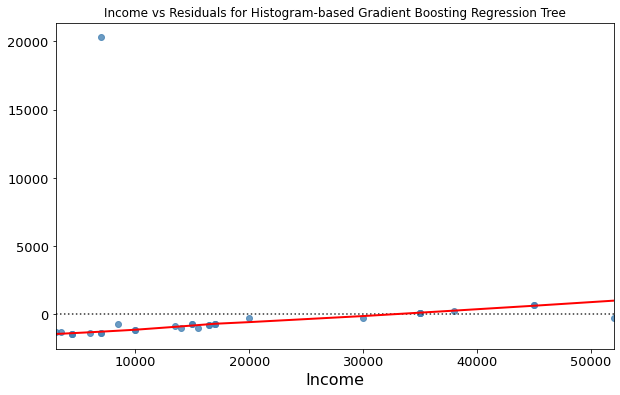

In [285]:
scatter_plot(y_test, y_pred,'Histogram-based Gradient Boosting Regression Tree')

In [286]:
import pickle
pickle.dump(hist, open('income.pkl', 'wb'))